<a href="https://colab.research.google.com/github/shadan-pk/DisasterChatbot/blob/master/LightGBM_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LightGBM Classification Project**




In this project, I will discuss one of the most successful ML algorithm LightGBM Classifier. LightGBM is a fast, distributed, high performance gradient boosting framework based on decision tree algorithms, used for ranking, classification and many other machine learning tasks. It has helped Kagglers win data science competitions.


So, let's get started.

## **Table of Contents**

- 1.	Introduction to LightGBM
- 2.	LightGBM intuition
   - 2.1	Leaf-wise tree growth
   - 2.2	Level-wise tree growth
   - 2.3	Important points about tree-growth
- 3.	XGBoost Vs LightGBM
- 4.	LightGBM Parameters
   - 4.1	Control Parameters
   - 4.2	Core Parameters
   - 4.3	Metric Parameter
   - 4.4	IO Parameter
- 5.	LightGBM implementation in Python
   - 5.1	Load packages
   - 5.2	Read dataset
   - 5.3	Preview dataset
   - 5.4	Summary of dataset
   - 5.5	Check the distribution of target variable
   - 5.6	Declare feature vector and target variable
   - 5.7	Split data into training and test set
   - 5.8	LightGBM model development and training
   - 5.9	Model prediction
   - 5.10	Model accuracy
   - 5.11	Compare train and test set accuracy
   - 5.12	Check for overfitting
   - 5.13	Confusion-matrix
   - 5.14	Classification-metrices
- 6.	Results and conclusion
- 7.	LightGBM parameter tuning
   - 7.1	For faster speed
   - 7.2	For better accuracy
   - 7.3	To deal with over-fitting
- 8.	References




## **1. Introduction to LightGBM**


- [LightGBM](https://github.com/Microsoft/LightGBM) is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

  - Faster training speed and higher efficiency.
  - Lower memory usage.
  - Better accuracy.
  - Support of parallel and GPU learning.
  - Capable of handling large-scale data.
  
  
- At present, decision tree based machine learning algorithms dominate Kaggle competitions. The winning solutions in these competitions have adopted an alogorithm called **XGBoost**.

- A couple of years ago, Microsoft announced its gradient boosting framework LightGBM. Nowadays, it steals the spotlight in gradient boosting machines. Kagglers start to use LightGBM more than XGBoost. LightGBM is 6 times faster than XGBoost.

- LightGBM is a relatively new algorithm and have long list of parameters given in the [LightGBM documentation](https://github.com/microsoft/LightGBM),

- The size of dataset is increasing rapidly. It is become very difficult for traditional data science algorithms to give accurate results. Light GBM is prefixed as **Light** because of its high speed. **LightGBM can handle the large size of data and takes lower memory to run**.

- Another reason why Light GBM is so popular is because it focuses on accuracy of results. LGBM also supports GPU learning and thus data scientists are widely using LGBM for data science application development.

- It is not advisable to use LGBM on small datasets. LightGBM is sensitive to overfitting and can easily overfit small data.

## **2. LightGBM intuition**


- LightGBM is a gradient boosting framework that uses tree based learning algorithm.


- LightGBM documentation states that -

 `LightGBM grows tree vertically while other tree based learning algorithms grow trees horizontally.
 It means that LightGBM grows tree leaf-wise while other algorithms grow level-wise. It will choose
 the leaf with max delta loss to grow. When growing the same leaf, leaf-wise algorithm can reduce more
 loss than a level-wise algorithm.`


 - So, we need to understand the distinction between leaf-wise tree growth and level-wise tree growth.


### **2.1 Leaf-wise tree growth**


- Leaf-wise tree growth can best be explained with the following visual -

![Leaf-wise tree growth](https://i.stack.imgur.com/YOE9y.png)

### **2.2 Level-wise tree growth**

- Most decision tree learning algorithms grow tree by level (depth)-wise.

- Level-wise tree growth can best be explained with the following visual -

![Level-wise tree growth](https://i.stack.imgur.com/e1FWe.png)

### **2.3 Important points about tree-growth**


- If we grow the full tree, **best-first (leaf-wise)** and **depth-first (level-wise)** will result in the same tree. The difference is in the order in which the tree is expanded. Since we don't normally grow trees to their full depth, order matters.

- Application of early stopping criteria and pruning methods can result in very different trees. Because leaf-wise chooses splits based on their contribution to the global loss and not just the loss along a particular branch, it often (not always) will learn lower-error trees "faster" than level-wise.

- For a small number of nodes, leaf-wise will probably out-perform level-wise. As we add more nodes, without stopping or pruning they will converge to the same performance because they will literally build the same tree eventually.

## **3. XGBoost Vs LightGBM**


- [XGBoost](https://github.com/dmlc/xgboost) is a very fast and accurate ML algorithm. But now it's been challenged by [LightGBM](https://github.com/microsoft/LightGBM) — which runs even faster with comparable model accuracy and more hyperparameters for users to tune.

- The key difference in speed is because **XGBoost split the tree nodes one level at a time** and **LightGBM does that one node at a time**.

- So XGBoost developers later improved their algorithms to catch up with LightGBM, allowing users to also run XGBoost in split-by-leaf mode `(grow_policy = ‘lossguide’)`. Now XGBoost is much faster with this improvement, but LightGBM is still about 1.3X — 1.5X the speed of XGB.

- Another difference between XGBoost and LightGBM is that XGBoost has a feature that LightGBM lacks — **monotonic constraint**. It will sacrifice some model accuracy and increase training time, but may improve model interpretability.

## **4. LightGBM Parameters**


- [LightGBM](https://github.com/microsoft/LightGBM) provides more than 100 [LightGBM parameters](https://github.com/microsoft/LightGBM/blob/master/docs/Parameters.rst).

- It is very important to know some basic parameters of LightGBM.

- So, in this section, I will discuss some basic parameters of LightGBM.


### **4.1 Control Parameters**

- **max_depth** : It describes the maximum depth of tree. This parameter is used to handle model overfitting. If you feel that your model is overfitted, you should to lower max_depth.

- **min_data_in_leaf** : It is the minimum number of the records a leaf may have. The default value is 20, optimum value. It is also used to deal with overfitting.

- **feature_fraction**: Used when your boosting is random forest. 0.8 feature fraction means LightGBM will select 80% of parameters randomly in each iteration for building trees.

- **bagging_fraction** : specifies the fraction of data to be used for each iteration and is generally used to speed up the training and avoid overfitting.

- **early_stopping_round** : This parameter can help you speed up your analysis. Model will stop training if one metric of one validation data doesn’t improve in last early_stopping_round rounds. This will reduce excessive iterations.

- **lambda** : lambda specifies regularization. Typical value ranges from 0 to 1.

- **min_gain_to_split** : This parameter will describe the minimum gain to make a split. It can used to control number of useful splits in tree.

- **max_cat_group** : When the number of category is large, finding the split point on it is easily over-fitting. So LightGBM merges them into ‘max_cat_group’ groups, and finds the split points on the group boundaries, default:64.

### **4.2 Core Parameters**

- **Task** : It specifies the task you want to perform on data. It may be either train or predict.

- **application** : This is the most important parameter and specifies the application of your model, whether it is a regression problem or classification problem. LightGBM will by default consider model as a regression model.

  - **regression** : for regression
  - **binary** : for binary classification
  - **multiclass** : for multiclass classification problem
  
  
- **boosting** : defines the type of algorithm you want to run, default=gdbt.

  - **gbdt** : traditional Gradient Boosting Decision Tree
  - **rf** : random forest
  - **dart** : Dropouts meet Multiple Additive Regression Trees
  - **goss** : Gradient-based One-Side Sampling
  
  
- **num_boost_round** : Number of boosting iterations, typically 100+

- **learning_rate** : This determines the impact of each tree on the final outcome. GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates. Typical values: 0.1, 0.001, 0.003…

- **num_leaves** : number of leaves in full tree, default: 31

- **device** : default: cpu, can also pass gpu

### **4.3 Metric Parameter**


- metric: again one of the important parameter as it specifies loss for model building. Below are few general losses for regression and classification.

  - **mae** : mean absolute error
  - **mse** : mean squared error
  - **binary_logloss** : loss for binary classification
  - **multi_logloss** : loss for multi classification

### **4.4 IO Parameter**

- **max_bin** : it denotes the maximum number of bin that feature value will bucket in.

- **categorical_feature** : It denotes the index of categorical features. If categorical_features=0,1,2 then column 0, column 1 and column 2 are categorical variables.

- **ignore_column** : same as categorical_features just instead of considering specific columns as categorical, it will completely ignore them.

- **save_binary** : If you are really dealing with the memory size of your data file then specify this parameter as ‘True’. Specifying parameter true will save the dataset to binary file, this binary file will speed your data reading time for the next time.

Now, we move on to the LightGBM implementation.

## **5. LightGBM implementation in Python**

### **5.1 Load packages**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization


In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


### **5.2 Read dataset**

In [ ]:
from google.colab import drive

drive.mount('/content/converted_dataset.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load dataset
df = pd.read_csv('/content/converted_dataset.csv')


### **5.3 Preview dataset**

In [4]:
df.head()

,date,time,Severity,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,cloud_cover,wind_speed_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,forest_fire,FFMC,DMC,DC,ISI,BUI,FWI
0,01-01-20,7:00:00,0.0,6.061000,67.824059,0.0,933.246216,20.400002,6.638072,6.061,8.061001,0.364,0.372,0,85.213481,6.422435,20.48494,0.820074,6.535365,0.692174
1,01-01-20,9:00:00,0.0,3.861000,77.639603,0.0,931.856018,26.700001,4.693825,5.311,7.761000,0.364,0.372,0,84.465548,6.424326,22.43392,0.489779,6.578585,0.413716
2,01-01-20,12:00:00,0.0,4.361000,75.236038,0.0,931.915161,14.400001,4.610250,3.911,6.961000,0.359,0.370,0,84.229353,6.426632,24.47290,0.462396,6.619842,0.390879
3,01-01-20,15:00:00,0.0,6.111000,73.412125,0.0,932.712647,20.700001,8.788720,4.611,6.511000,0.359,0.369,0,84.497521,6.429900,26.82688,1.027850,6.663422,0.869563
4,01-01-20,18:00:00,0.0,12.561001,61.951244,0.0,934.771851,0.000000,6.489992,7.461,6.511000,0.358,0.369,0,85.265795,6.438760,30.34186,0.805188,6.724585,0.681946


### **5.4 Summary of dataset**

In [5]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17201 entries, 0 to 17200
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        17201 non-null  object 
 1   time                        17201 non-null  object 
 2   Severity                    17201 non-null  float64
 3   temperature_2m              17201 non-null  float64
 4   relative_humidity_2m        17201 non-null  float64
 5   precipitation               17201 non-null  float64
 6   surface_pressure            17201 non-null  float64
 7   cloud_cover                 17201 non-null  float64
 8   wind_speed_10m              17201 non-null  float64
 9   soil_temperature_0_to_7cm   17201 non-null  float64
 10  soil_temperature_7_to_28cm  17201 non-null  float64
 11  soil_moisture_0_to_7cm      17201 non-null  float64
 12  soil_moisture_7_to_28cm     17201 non-null  float64
 13  forest_fire                 172

- We can see that there are 6 columns in the dataset and there are no missing values.

### **5.5 Check the distribution of target variable**

-  Target variable is `diagnosis`
-  check the distribution of the target variable.

In [9]:
# check the distribution of the target variable
df['forest_fire'].value_counts()

,count
forest_fire,
0,11688
1,5513


- The target variable is `diagnosis`. It contains 2 values - 0 and 1.

- `0` is for **Negative prediction** and `1` for **Positive prediction**.

- We  can see that the problem is binary classification task.

### **5.6 Declare feature vector and target variable**

In [10]:
X = df[['temperature_2m','relative_humidity_2m','precipitation','wind_speed_10m','FFMC','DMC','DC','ISI','BUI','FWI']]
y = df['forest_fire']

### **5.7 Split data into training and test set**

In [11]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### **5.8 LightGBM model development and training**


- We need to convert our training data into LightGBM dataset format(this is mandatory for LightGBM training).

- After creating the necessary dataset, we created a python dictionary with parameters and their values.

- Accuracy of the model depends on the values we provide to the parameters.

- In the end block of code, we simply trained model with 100 iterations.

In [12]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3820, number of negative: 8220
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2335
[LightGBM] [Info] Number of data points in the train set: 12040, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.317276 -> initscore=-0.766320
[LightGBM] [Info] Start training from score -0.766320


LGBMClassifier()

### **5.9 Model prediction**

In [13]:
# predict the results
y_pred=clf.predict(X_test)


### **5.10 Model accuracy**

In [14]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9950


- Here, `y_test` are the true class labels and `y_pred` are the predicted class labels in the test-set.

### **5.11 Compare train and test set accuracy**

- Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [15]:
y_pred_train = clf.predict(X_train)

In [16]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


### **5.12 Check for overfitting**

In [17]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9950


- The training and test set accuracy are quite comparable. So, we cannot say there is overfitting.

### **5.13 Confusion-matrix**

In [18]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3458   10]
 [  16 1677]]

True Positives(TP) =  3458

True Negatives(TN) =  1677

False Positives(FP) =  10

False Negatives(FN) =  16


<Axes: >

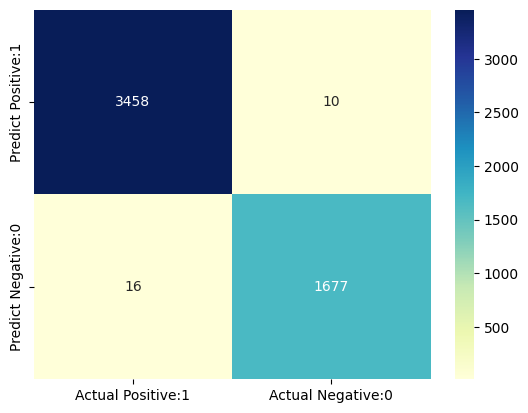

In [19]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### **5.14 Classification metrices**

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3468
           1       0.99      0.99      0.99      1693

    accuracy                           0.99      5161
   macro avg       0.99      0.99      0.99      5161
weighted avg       0.99      0.99      0.99      5161



In [23]:
# build the lightgbm model
import lightgbm as lgb
import joblib  # Import joblib for saving the model

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

# Save the model to a .pkl file
model_filename = 'lightgbm_model.pkl'
joblib.dump(clf, model_filename)
print(f"Model saved as {model_filename}")

# Optional: Load the model back to verify
loaded_model = joblib.load(model_filename)
print("Model loaded successfully for verification")

[LightGBM] [Info] Number of positive: 3820, number of negative: 8220
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2335
[LightGBM] [Info] Number of data points in the train set: 12040, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.317276 -> initscore=-0.766320
[LightGBM] [Info] Start training from score -0.766320
Model saved as lightgbm_model.pkl
Model loaded successfully for verification


In [27]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the saved LightGBM model
model_filename = 'lightgbm_model.pkl'
try:
    model = joblib.load(model_filename)
    print("Model loaded successfully.")
except FileNotFoundError:
    print(f"Error: The model file '{model_filename}' was not found. Please ensure it exists.")
    exit()

# Feature names for user input
feature_names = [
    'temperature_2m', 'relative_humidity_2m', 'precipitation', 'wind_speed_10m',
    'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'
]

# Optional: Load test data for accuracy evaluation (assuming from your original code)
try:
    df = pd.read_csv('/content/converted_dataset.csv')
    X = df[['temperature_2m', 'relative_humidity_2m', 'precipitation', 'wind_speed_10m', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
    y = df['forest_fire']
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    print("Test data loaded for accuracy evaluation.")
except FileNotFoundError:
    print("Test dataset not found. Proceeding with prediction-only mode.")
    X_test, y_test = None, None

def get_user_input():
    """Helper function to get feature values from the user."""
    print("\nEnter the following feature values (or type 'exit' to finish):")
    feature_values = []
    for feature in feature_names:
        value = input(f"{feature}: ")
        if value.lower() == 'exit':
            return None
        try:
            feature_values.append(float(value))
        except ValueError:
            print(f"Invalid input for {feature}. Please enter a numeric value.")
            return None
    return np.array(feature_values).reshape(1, -1)

def plot_accuracy_graph(predictions, true_labels):
    """Function to plot the accuracy history based on test set."""
    if len(predictions) == 0 or len(true_labels) == 0:
        print("No data to plot.")
        return

    accuracy_history = []
    for i in range(1, len(predictions) + 1):
        accuracy_history.append(accuracy_score(true_labels[:i], predictions[:i]))

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(accuracy_history) + 1), accuracy_history, marker='o', linestyle='-', color='b')
    plt.title('Model Accuracy Over Test Cases')
    plt.xlabel('Number of Test Cases')
    plt.ylabel('Cumulative Accuracy')
    plt.grid(True)
    plt.ylim(0, 1.1)  # Accuracy range from 0 to 1, with some padding
    plt.xticks(range(1, len(accuracy_history) + 1))
    for i, acc in enumerate(accuracy_history):
        plt.text(i + 1, acc, f'{acc:.4f}', ha='center', va='bottom')
    plt.show()

def test_model():
    """Main function to run the test interface."""
    print("=== LightGBM Model Test Interface ===")
    print("Provide feature values to get predictions. Type 'exit' to finish.\n")

    user_predictions = []

    while True:
        # Get feature values
        test_data = get_user_input()
        if test_data is None:
            break

        # Make prediction
        prediction = model.predict(test_data)[0]
        user_predictions.append(prediction)

        # Display result
        print(f"\nPredicted label: {prediction} ({'Fire' if prediction == 1 else 'No Fire'})")

    # Evaluate on test set if available and plot accuracy
    if X_test is not None and y_test is not None:
        test_predictions = model.predict(X_test)
        final_accuracy = accuracy_score(y_test, test_predictions)
        print("\n=== Test Set Evaluation ===")
        print(f"Total test cases from dataset: {len(y_test)}")
        print(f"Test set accuracy: {final_accuracy:.4f}")
        plot_accuracy_graph(test_predictions, y_test)
    else:
        print("\nNo test dataset available for accuracy evaluation.")

    # Summary of user predictions
    if user_predictions:
        print("\n=== User Input Summary ===")
        print(f"Total user predictions made: {len(user_predictions)}")
        print(f"Predicted outcomes: {['Fire' if p == 1 else 'No Fire' for p in user_predictions]}")

# Run the test interface
if __name__ == "__main__":
    test_model()

SyntaxError: invalid syntax (<ipython-input-27-0f529da68418>, line 110)

In [ ]:
import joblib
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the saved LightGBM model
model_filename = 'lightgbm_model.pkl'
try:
    model = joblib.load(model_filename)
    print("Model loaded successfully.")
except FileNotFoundError:
    print(f"Error: The model file '{model_filename}' was not found. Please ensure it exists.")
    exit()

# Feature names for user input
feature_names = [
    'temperature_2m', 'relative_humidity_2m', 'precipitation', 'wind_speed_10m',
    'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'
]

# Lists to store true labels, predictions, and cumulative accuracy
true_labels = []
predictions = []
accuracy_history = []

def get_user_input():
    """Helper function to get feature values from the user."""
    print("\nEnter the following feature values (or type 'exit' to finish):")
    feature_values = []
    for feature in feature_names:
        value = input(f"{feature}: ")
        if value.lower() == 'exit':
            return None
        try:
            feature_values.append(float(value))
        except ValueError:
            print(f"Invalid input for {feature}. Please enter a numeric value.")
            return None
    return np.array(feature_values).reshape(1, -1)

def get_true_label():
    """Helper function to get the true label from the user."""
    while True:
        label = input("Enter the true label (0 for no fire, 1 for fire): ")
        if label.lower() == 'exit':
            return None
        if label in ['0', '1']:
            return int(label)
        print("Invalid input. Please enter 0 or 1.")

def plot_accuracy_graph():
    """Function to plot the accuracy history."""
    if len(accuracy_history) == 0:
        print("No data to plot.")
        return

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(accuracy_history) + 1), accuracy_history, marker='o', linestyle='-', color='b')
    plt.title('Model Accuracy Over Test Cases')
    plt.xlabel('Number of Test Cases')
    plt.ylabel('Cumulative Accuracy')
    plt.grid(True)
    plt.ylim(0, 1.1)  # Accuracy range from 0 to 1, with some padding
    plt.xticks(range(1, len(accuracy_history) + 1))
    for i, acc in enumerate(accuracy_history):
        plt.text(i + 1, acc, f'{acc:.4f}', ha='center', va='bottom')
    plt.show()

def test_model():
    """Main function to run the test interface."""
    print("=== LightGBM Model Test Interface ===")
    print("Provide test data to evaluate the model. Type 'exit' at any input to finish.\n")

    while True:
        # Get feature values
        test_data = get_user_input()
        if test_data is None:
            break

        # Get true label
        true_label = get_true_label()
        if true_label is None:
            break

        # Make prediction
        prediction = model.predict(test_data)[0]
        true_labels.append(true_label)
        predictions.append(prediction)

        # Calculate and store current accuracy
        current_accuracy = accuracy_score(true_labels, predictions)
        accuracy_history.append(current_accuracy)

        # Display result
        print(f"\nPredicted label: {prediction} ({'Fire' if prediction == 1 else 'No Fire'})")
        print(f"True label: {true_label} ({'Fire' if true_label == 1 else 'No Fire'})")
        print(f"Match: {prediction == true_label}")
        print(f"Current accuracy based on {len(true_labels)} test cases: {current_accuracy:.4f}")

    # Final summary and plot
    if len(true_labels) > 0:
        final_accuracy = accuracy_score(true_labels, predictions)
        print("\n=== Test Summary ===")
        print(f"Total test cases: {len(true_labels)}")
        print(f"Final accuracy: {final_accuracy:.4f}")
        plot_accuracy_graph()
    else:
        print("\nNo test cases provided.")

# Run the test interface
if __name__ == "__main__":
    test_model()

## **6. Results and conclusion**

-	LightGBM model accuracy is found to be 0.9240.
-	The training and test set accuracy is quite comparable. So, there is no overfitting.
-	Confusion-matrix shows that TP = 55, TN = 103, FP = 8 and FN = 5.
-	Precision and recall for positive prediction is 0.93 and 0.95 respectively.



## **7. LightGBM parameter tuning**  


- In this section, I will discuss some tips to improve LightGBM model efficiency.

- Following set of practices can be used to improve your model efficiency.

  - 1 **num_leaves** : This is the main parameter to control the complexity of the tree model. Ideally, the value of num_leaves should be less than or equal to 2^(max_depth). Value more than this will result in overfitting.

  - 2 **min_data_in_leaf** : Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.

  - 3 **max_depth** : We also can use max_depth to limit the tree depth explicitly.

### **7.1 For faster speed**

- Use bagging by setting `bagging_fraction` and `bagging_freq`.
- Use feature sub-sampling by setting `feature_fraction`.
- Use small `max_bin`.
- Use `save_binary` to speed up data loading in future learning.

### **7.2 For better accuracy**

- Use large `max_bin` (may be slower).
- Use small `learning_rate` with `large num_iterations`
- Use large `num_leaves`(may cause over-fitting)
- Use bigger training data
- Try `dart`
- Try to use categorical feature directly.

### **7.3 To deal with over-fitting**

- Use small `max_bin`
- Use small `num_leaves`
- Use `min_data_in_leaf` and `min_sum_hessian_in_leaf`
- Use bagging by set `bagging_fraction` and `bagging_freq`
- Use feature sub-sampling by set `feature_fraction`
- Use bigger training data
- Try `lambda_l1`, `lambda_l2` and `min_gain_to_split` to regularization
- Try `max_depth` to avoid growing deep tree

## **8. References**  


- The ideas and concepts in this project are taken from the following websites -

- https://github.com/Microsoft/LightGBM

- https://github.com/microsoft/LightGBM/blob/master/docs/Parameters.rst

- https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

- https://sefiks.com/2018/10/13/a-gentle-introduction-to-lightgbm-for-applied-machine-learning/

- https://towardsdatascience.com/build-xgboost-lightgbm-models-on-large-datasets-what-are-the-possible-solutions-bf882da2c27d

